# Shallow water equations -- Riemann solver tests

Note this requires the `ipywidgets` package and the master branch of `$CLAW/riemann`.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from ipywidgets import StaticInteract, RangeWidget
#ipywidgets-static is obsolete and no longer supported
#see https://github.com/jakevdp/ipywidgets-static
from ipywidgets import interact, interactive
from clawpack import riemann

The next cell imports a module containing a function that takes a Riemann problem (left state, right state, and approximate solver), and computes the Riemann solution, as well as functions to plot the solution in various forms.

In [17]:
from clawpack.riemann import riemann_tools   
import SW_exact_Riemann_solver
import SW_phase

# Shallow water equations: exact solution

We can compute the exact solution to the Riemann problem for the shallow water equations.
See [SW_exact_Riemann_solver.py](SW_exact_Riemann_solver.py)

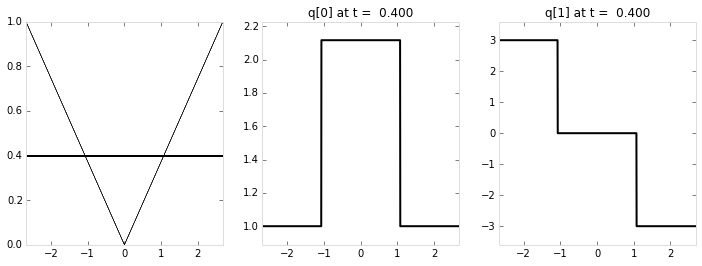

<function clawpack.riemann.riemann_tools.plot_function>

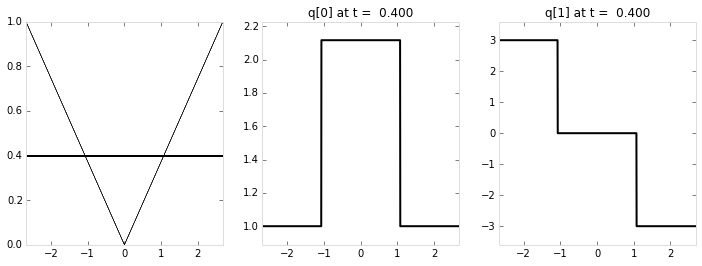

In [24]:
grav = 9.81

q_l = np.array((1.,3.))
q_r = np.array((1.,-3.))

ex_states, ex_speeds, reval = SW_exact_Riemann_solver.exact_riemann_solution(q_l ,q_r, grav)

print "States in solution:"
print ex_states

plot_function = riemann_tools.make_plot_function(ex_states, ex_speeds, reval)
#StaticInteract(plot_function, t=RangeWidget(0,.9,.1))
interact(plot_function, t=(0.,.9,.1))

# Shallow water: approximate solutions
We can also easily compare the approximate solutions given by, say, a Roe solver for the SW equations.  The phase plane plot below is created using the [SW_phase.py](SW_phase.py) module.

## Roe solver:

Roe solver solution to SW equations:


(-6, 6)

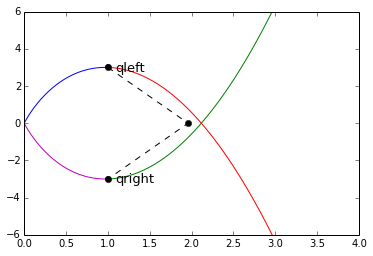

In [19]:
solver = riemann.shallow_1D_py.shallow_roe_1D
num_eqn = riemann.shallow_1D_py.num_eqn

problem_data = {}
problem_data['grav'] = grav
problem_data['efix'] = False

print "Roe solver solution to SW equations:"
#states, s, roe_eval = riemann_tools.riemann_solution(num_eqn,solver,q_l,q_r,problem_data=problem_data)
#I think in 5.3.1, the order of arguments for riemann_solution() has changed
states, s, roe_eval = riemann_tools.riemann_solution(solver,q_l,q_r,problem_data=problem_data)

#riemann_tools.plot_phase(states)

plt.figure()
SW_phase.phase_plane_curves(q_l[0],q_l[1],'qleft',1)
SW_phase.phase_plane_curves(q_r[0],q_r[1],'qright',2)
plt.plot(states[0,:],states[1,:],'k--o')
plt.xlim(0,4)
plt.ylim(-6,6)

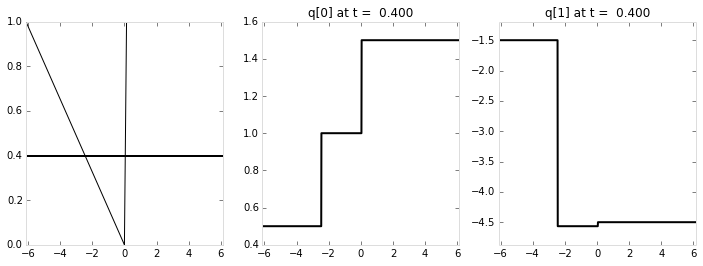

<function clawpack.riemann.riemann_tools.plot_function>

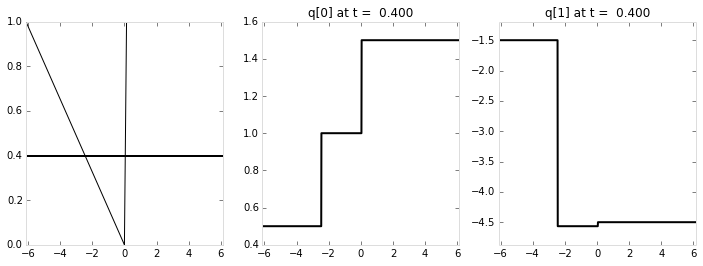

In [25]:
plot_function = riemann_tools.make_plot_function(states,s,roe_eval)
#StaticInteract(plot_function, t=RangeWidget(0,.9,.1))
interact(plot_function, t=(0.,.9,.1))

## Compare the exact and Roe solutions:

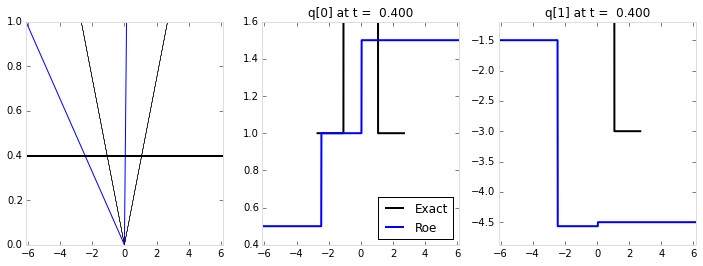

<function clawpack.riemann.riemann_tools.plot_function>

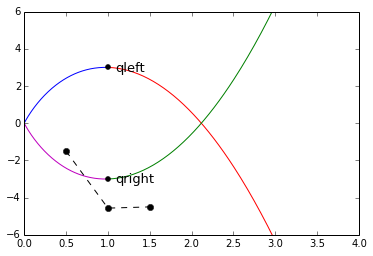

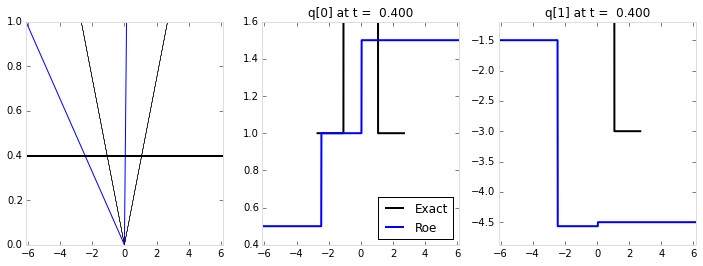

In [26]:
plot_function = riemann_tools.make_plot_function([ex_states,states],
                                                 [ex_speeds,s],
                                                 [reval,roe_eval],
                                                 ['Exact','Roe'])
plt.figure()
SW_phase.phase_plane_curves(q_l[0],q_l[1],'qleft',1)
SW_phase.phase_plane_curves(q_r[0],q_r[1],'qright',2)
plt.plot(states[0,:],states[1,:],'k--o')
plt.xlim(0,4)
plt.ylim(-6,6)

#StaticInteract(plot_function, t=RangeWidget(0,.9,.1))
interact(plot_function, t=(0.,.9,.1))

## Example with a rarefaction wave

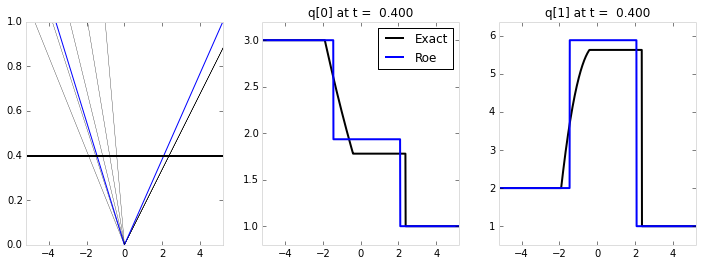

<function clawpack.riemann.riemann_tools.plot_function>

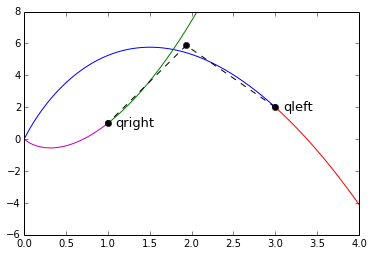

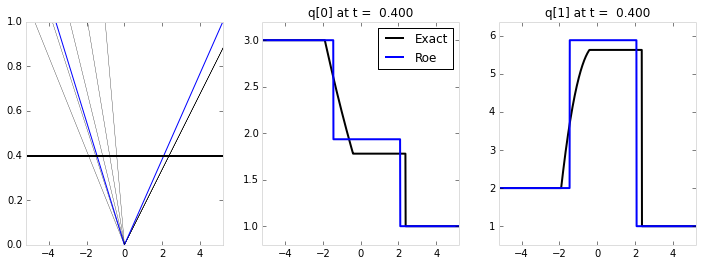

In [27]:
q_l = np.array((3.,2.))
q_r = np.array((1.,1.))

ex_states, ex_speeds, reval = SW_exact_Riemann_solver.exact_riemann_solution(q_l ,q_r, grav)

#states, s, roe_eval = riemann_tools.riemann_solution(num_eqn,solver,q_l,q_r,problem_data=problem_data)
states, s, roe_eval = riemann_tools.riemann_solution(solver,q_l,q_r,problem_data=problem_data)


plot_function = riemann_tools.make_plot_function([ex_states,states],
                                                 [ex_speeds,s],
                                                 [reval,roe_eval],
                                                 ['Exact','Roe'])
plt.figure()
SW_phase.phase_plane_curves(q_l[0],q_l[1],'qleft',1)
SW_phase.phase_plane_curves(q_r[0],q_r[1],'qright',2)
plt.plot(states[0,:],states[1,:],'k--o')
plt.xlim(0,4)
plt.ylim(-6,8)

#StaticInteract(plot_function, t=RangeWidget(0,.9,.1))
interact(plot_function, t=(0.,.9,.1))

## Example with a transonic rarefaction

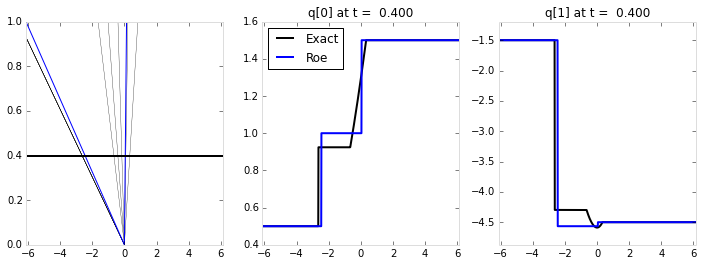

<function clawpack.riemann.riemann_tools.plot_function>

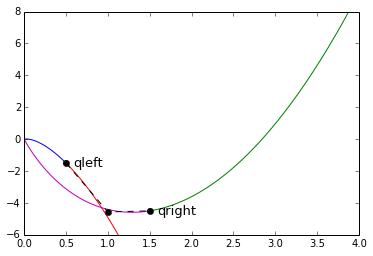

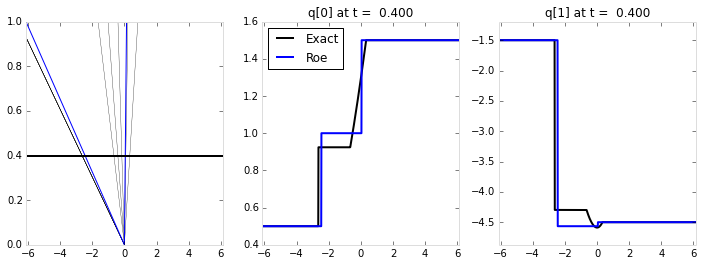

In [28]:
q_l = np.array((0.5, -1.5))
q_r = np.array((1.5, -4.5))

ex_states, ex_speeds, reval = SW_exact_Riemann_solver.exact_riemann_solution(q_l ,q_r, grav)

#states, s, roe_eval = riemann_tools.riemann_solution(num_eqn,solver,q_l,q_r,problem_data=problem_data)
states, s, roe_eval = riemann_tools.riemann_solution(solver,q_l,q_r,problem_data=problem_data)


plot_function = riemann_tools.make_plot_function([ex_states,states],
                                                 [ex_speeds,s],
                                                 [reval,roe_eval],
                                                 ['Exact','Roe'])
plt.figure()
SW_phase.phase_plane_curves(q_l[0],q_l[1],'qleft',1)
SW_phase.phase_plane_curves(q_r[0],q_r[1],'qright',2)
plt.plot(states[0,:],states[1,:],'k--o')
plt.xlim(0,4)
plt.ylim(-6,8)

#StaticInteract(plot_function, t=RangeWidget(0,.9,.1))
interact(plot_function, t=(0.,.9,.1))